In [ ]:
import sys
sys.path.append("../src/models/")
sys.path.append("../src/")

In [1]:
import os
import glob
import torch
import numpy as np
from skimage import io, transform
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

/home/makam0a/anaconda3/envs/transformer/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

In [4]:
from data import get_dataset
derain_dataset = get_dataset('derain')
firstbreak_dataset = get_dataset('firstbreak')

In [5]:
workers = 1
batch_size = 100
dataloader = DataLoader(derain_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

In [6]:
sample = iter(dataloader).next()
sample

{'input': tensor([[[[0.8275, 0.9725, 0.9412,  ..., 0.9804, 0.9882, 0.9882],
           [0.8431, 0.9686, 0.9176,  ..., 0.9765, 0.9882, 0.9882],
           [0.8588, 0.9608, 0.8902,  ..., 0.9765, 0.9882, 0.9843],
           ...,
           [0.9647, 0.9765, 0.9412,  ..., 0.6196, 0.4980, 0.4431],
           [0.9529, 0.9608, 0.9255,  ..., 0.8157, 0.6941, 0.6980],
           [0.9725, 0.9765, 0.9373,  ..., 0.6196, 0.5451, 0.6588]],
 
          [[0.8706, 1.0000, 0.9843,  ..., 0.9961, 1.0000, 1.0000],
           [0.8863, 1.0000, 0.9647,  ..., 0.9922, 1.0000, 1.0000],
           [0.9020, 1.0000, 0.9373,  ..., 0.9922, 1.0000, 1.0000],
           ...,
           [0.9961, 1.0000, 0.9765,  ..., 0.5451, 0.4196, 0.3686],
           [0.9843, 0.9922, 0.9569,  ..., 0.7412, 0.6157, 0.6235],
           [1.0000, 1.0000, 0.9686,  ..., 0.5412, 0.4667, 0.5843]],
 
          [[0.8549, 1.0000, 0.9686,  ..., 0.9922, 1.0000, 1.0000],
           [0.8706, 0.9961, 0.9490,  ..., 0.9882, 1.0000, 1.0000],
           [0.8

torch.Size([3, 224, 224])


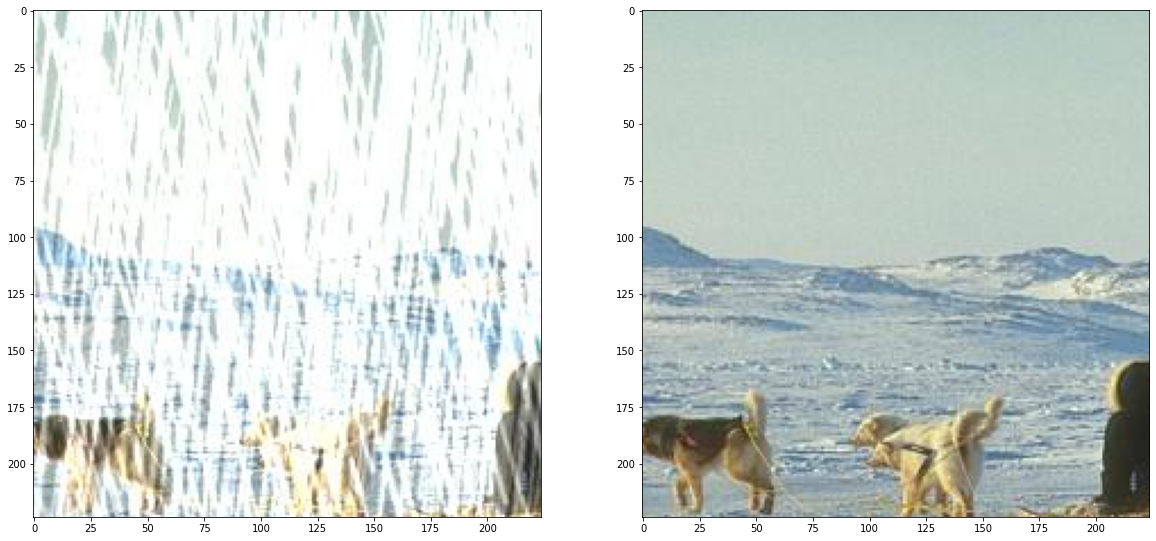

In [7]:
def show(sample, idx=0, axes=None):
    input = sample['input'][idx]
    target = sample['target'][idx]
    print(input.shape)
    if axes is None:
        fig, axes = plt.subplots(1,2, figsize=[20,10])
    axes[0].imshow(input.numpy().transpose((1, 2, 0)))
    axes[1].imshow(target.numpy().transpose((1, 2, 0)))

show(sample, idx=0)

In [8]:
dataloader = DataLoader(firstbreak_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

In [9]:
sample = iter(dataloader).next()
sample

{'input': tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.2355,  0.0572, -0.1588,  ..., -0.1477,  0.0755,  0.2803],
           [-0.1780, -0.1588,  0.0548,  ...,  0.0122, -0.1780, -0.1708],
           [ 0.0547,  0.2235,  0.1719,  ...,  0.2267,  0.2425,  0.0108]]],
 
 
         [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.0498,  0.0376,  0.1251,  ...,  0.1047,  0.0284,  0.0704],
           [ 0.1008,  0.0723, -0.1085,  ..., -0.0539,  0.0890,  0.0900],
           [-0.1558, -0.2344, -0.0990,  ..., -0.1738, -0.2383, -0.0947]]],
 
 
         [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]

torch.Size([1, 256, 256])


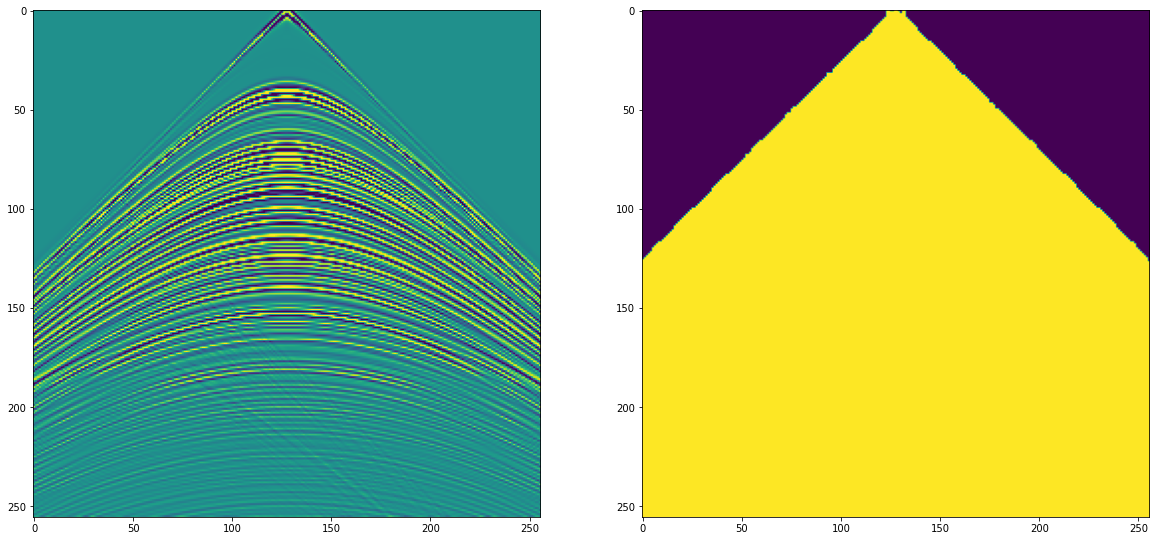

In [10]:
show(sample, idx=0)